# Homework 2
## James Hamski
*Problem:
Approximate the function z = 2x^2 - 3y^2 + 1 (no noise). Train the network using the following two loss functions: mean absolute value, mean squared error. What is the difference in performance on your test set? How numerically stable are these results?*

In [1]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD, adam


import matplotlib.pyplot as plt

Using Theano backend.


In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Training Set Generation

In [3]:
# create an XY grid from -10 to 10 at 0.1 increments, calculate Z using the polynomial

xy_range = np.arange(-10, 10.1, 0.1)

X = np.repeat(xy_range, len(xy_range))
Y = np.tile(xy_range, len(xy_range))
Z = 2 * (X **2) - 3 * (Y**2) + 1

XY_data = np.vstack((X,Y)).T

## Function Approximation - Mean Absolute Error Loss Function

In [4]:
sgd = SGD(lr=0.5)

In [5]:
model = Sequential()
model.add(Dense(100, input_dim=2))
model.add(Activation('tanh'))
model.add(Dense(1))
model.compile(loss='mean_absolute_error', optimizer='sgd')

model.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=2)

Epoch 1/80
1s - loss: 67.2968
Epoch 2/80
2s - loss: 23.8301
Epoch 3/80
1s - loss: 17.1870
Epoch 4/80
1s - loss: 14.6233
Epoch 5/80
1s - loss: 13.2284
Epoch 6/80
1s - loss: 11.9523
Epoch 7/80
1s - loss: 11.0272
Epoch 8/80
1s - loss: 10.3301
Epoch 9/80
1s - loss: 9.8350
Epoch 10/80
1s - loss: 9.4003
Epoch 11/80
1s - loss: 9.2228
Epoch 12/80
1s - loss: 9.0955
Epoch 13/80
1s - loss: 8.6388
Epoch 14/80
1s - loss: 8.3308
Epoch 15/80
1s - loss: 8.3393
Epoch 16/80
1s - loss: 8.1365
Epoch 17/80
1s - loss: 7.8935
Epoch 18/80
1s - loss: 7.6691
Epoch 19/80
1s - loss: 7.4482
Epoch 20/80
1s - loss: 7.3811
Epoch 21/80
1s - loss: 7.2760
Epoch 22/80
1s - loss: 7.2058
Epoch 23/80
1s - loss: 7.0468
Epoch 24/80
1s - loss: 6.9931
Epoch 25/80
2s - loss: 6.8387
Epoch 26/80
1s - loss: 6.8544
Epoch 27/80
1s - loss: 6.7728
Epoch 28/80
1s - loss: 6.6346
Epoch 29/80
1s - loss: 6.5059
Epoch 30/80
1s - loss: 6.5416
Epoch 31/80
1s - loss: 6.3463
Epoch 32/80
1s - loss: 6.3218
Epoch 33/80
1s - loss: 6.3713
Epoch 34/80

In [ ]:
score = model.evaluate(XY_data, Z, batch_size=16, verbose=2)

In [ ]:
score

In [ ]:
plt.plot(Z)

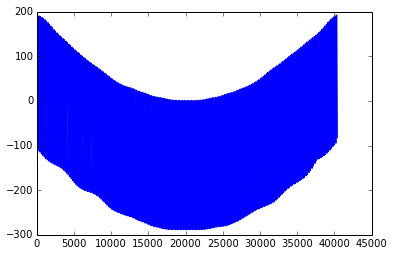

In [6]:
pred_z = model.predict(XY_data, batch_size=100)
plt.plot(pred_z)

In [7]:
error_surface = Z - pred_z

MemoryError: 

## Function Approximation - Mean Square Error Loss Function

In [8]:
model_mse = Sequential()
model_mse.add(Dense(150, input_dim=2))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(80))
model_mse.add(Activation('tanh'))
model_mse.add(Dense(1))
model_mse.compile(loss='mean_squared_error', optimizer='rmsprop')

model_mse.fit(XY_data, Z, nb_epoch=80, batch_size=10, verbose=2)

Epoch 1/80
2s - loss: 5963.5069
Epoch 2/80
3s - loss: 2079.6204
Epoch 3/80
3s - loss: 1127.8443
Epoch 4/80
3s - loss: 613.8233
Epoch 5/80
3s - loss: 336.2024
Epoch 6/80
3s - loss: 178.2778
Epoch 7/80
3s - loss: 95.9344
Epoch 8/80
3s - loss: 53.7803
Epoch 9/80
3s - loss: 32.9444
Epoch 10/80
3s - loss: 22.6245
Epoch 11/80
3s - loss: 17.2311
Epoch 12/80
3s - loss: 14.1712
Epoch 13/80
4s - loss: 12.5379
Epoch 14/80
3s - loss: 11.4418
Epoch 15/80
3s - loss: 10.7458
Epoch 16/80
3s - loss: 10.1144
Epoch 17/80
3s - loss: 9.6947
Epoch 18/80
3s - loss: 9.3434
Epoch 19/80
3s - loss: 9.1015
Epoch 20/80
3s - loss: 8.9290
Epoch 21/80
3s - loss: 8.6356
Epoch 22/80
3s - loss: 8.4155
Epoch 23/80
3s - loss: 8.1555
Epoch 24/80
3s - loss: 8.0002
Epoch 25/80
3s - loss: 7.8770
Epoch 26/80
3s - loss: 7.8355
Epoch 27/80
3s - loss: 7.6200
Epoch 28/80
5s - loss: 7.5005
Epoch 29/80
10s - loss: 7.4126
Epoch 30/80
4s - loss: 7.2059
Epoch 31/80
9s - loss: 7.1182
Epoch 32/80
6s - loss: 7.0782
Epoch 33/80
3s - loss: 

In [9]:
score_mse = model.evaluate(XY_data, Z, batch_size=16, verbose=2)

In [10]:
score_mse

6.362889884730996

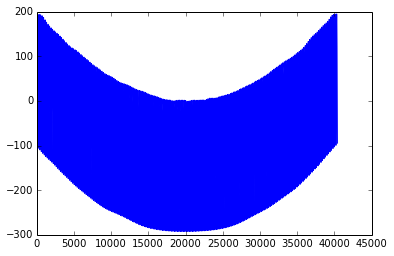

In [11]:
pred_z_mse = model_mse.predict(XY_data, batch_size=100)
plt.plot(pred_z_mse)

## Discussion